In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

893 893 384 384


# Decision Tree

Best parameters set found on development set:
 {'max_leaf_nodes': 30, 'min_samples_split': 75}

 Best Score 0.766623766282094

 Grid scores on development set:
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.752 (+/-0.041) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.752 (+/-0.041) for {'ma

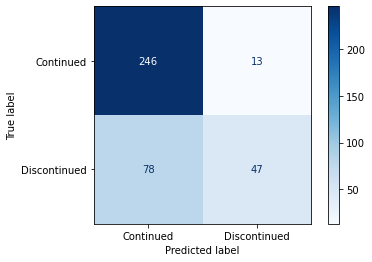

In [3]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{
    'min_samples_split': [i for i in range(5,80,5)], 
    'max_leaf_nodes':  [k for k in range(5,80,5)]
    }]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With SMOTE Oversampling

In [4]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1202 1202 384 384


Best parameters set found on development set:
 {'max_leaf_nodes': 35, 'min_samples_split': 10}

 Best Score 0.8045755476392245

 Grid scores on development set:
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.729 (+/-0.097) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.729 (+/-0.097) for {'m

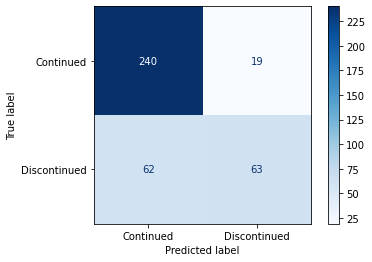

In [5]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With Borderline-SMOTE Oversampling

In [6]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1202 1202 384 384


Best parameters set found on development set:
 {'max_leaf_nodes': 30, 'min_samples_split': 10}

 Best Score 0.7965890031741519

 Grid scores on development set:
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.737 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.737 (+/-0.043) for {'m

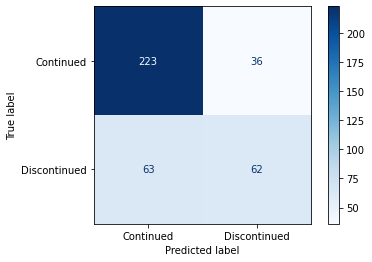

In [7]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With ADASYN Oversampling

In [8]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1168 1168 384 384


Best parameters set found on development set:
 {'max_leaf_nodes': 35, 'min_samples_split': 30}

 Best Score 0.7849579039707048

 Grid scores on development set:
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.724 (+/-0.060) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.724 (+/-0.060) for {'m

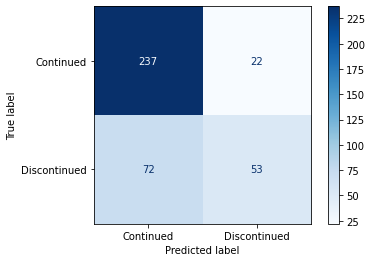

In [9]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)